# 新冠状病毒传播数据分析

## 1. 疫情初步分析，筛选相关性强的特征

通过官方公布的日频疫情数据、各地区（全国各省、直辖市、港澳台，去掉疫情严重的湖北和武汉）的历史天气、人口、GDP、距离武汉公里数等数据，筛选和确诊人数相关性强的特征。

所有数据都有各省、直辖市、港澳台、以及武汉，省的天气数据统计的是所在省会城市的数据。

### 1.1. 现有特征数据展示

In [1]:
# 日频数据的最后一天
last_date = '2020-02-01'

In [2]:
from coronavirus_analyzer import CoronavirusAnalyzer
# 初始化分析类
analyzer = CoronavirusAnalyzer(last_date)

2020-02-03 09:15:01,685 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.
2020-02-03 09:15:01,928 - CoronavirusAnalyzer - WARNING - 在最后一天（2020-02-01），如下这些地区没有新增的确诊人数：台湾、西藏，如下这些地区没有任何疫情数据变化：台湾、西藏。请确保这些地区已经公布了最后一天的数据（一般是后面一天上午公布），否则分析出来的结果可能不准确。


In [3]:
# 地区相互距离矩阵
import pandas as pd
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 8)
print(analyzer.df_distance.index.tolist())
analyzer.df_distance

['北京', '上海', '天津', '重庆', '黑龙江', '吉林', '辽宁', '内蒙古', '河北', '山西', '山东', '河南', '陕西', '甘肃', '宁夏', '青海', '新疆', '安徽', '江苏', '浙江', '湖南', '江西', '湖北', '四川', '贵州', '福建', '台湾', '广东', '海南', '广西', '云南', '西藏', '香港', '澳门', '武汉']


,北京,上海,天津,重庆,...,西藏,香港,澳门,武汉
北京,0.000000,1063.211982,103.589069,1464.353444,...,2566.591142,1963.500780,1979.971010,1047.708830
上海,1063.211982,0.000000,961.335849,1448.054847,...,2907.958210,1227.709844,1272.272492,685.093039
...,...,...,...,...,...,...,...,...,...
澳门,1979.971010,1272.272492,1908.890967,1072.535924,...,2384.032442,64.228639,0.000000,934.088338
武汉,1047.708830,685.093039,981.317616,762.974248,...,2232.235661,921.636262,934.088338,0.000000


In [4]:
# 地区信息
import pandas as pd
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 12)
analyzer.df_region

,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉
地区,,,,,,,,,,,
全国,1.395380e+09,9.003000e+13,64520.059052,54776300.0,0.0000,964.998822,NaN,NaN,NaN,NaN,NaN
广东,1.134600e+08,9.727777e+12,85737.502203,590000.0,0.0052,17.970000,1583.818086,6.6,23.133333,113.250000,836.326981
...,...,...,...,...,...,...,...,...,...,...,...
西藏,3.371500e+06,1.477630e+11,43827.079935,0.0,0.0000,122.840000,364348.212962,3658.0,29.666667,91.166667,2232.235661
澳门,6.320000e+05,3.609000e+11,571044.303797,0.0,0.0000,0.002540,40.189873,19.0,22.216667,113.550000,934.088338


In [5]:
# 历史天气文字转数值
from weather_crawler import WeatherCrawler
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)

weather_crawler = WeatherCrawler()
weather_crawler.weather_info

,晴,多云,阴,雾,大雾,霾,中度霾,重度霾,阵雨,小雨,小到中雨,中雨,中到大雨,大雨,雨夹雪,阵雪,小雪,小到中雪,中雪,中到大雪,大雪
晴雨度,3,2,1,0,0,0,0,0,-1,-2,-3,-4,-5,-6,-3,0,0,0,0,0,0
晴朗度,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
雾度,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
霾度,0,0,0,0,0,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0
降雨量,0,0,0,0,0,0,0,0,1,2,3,4,5,6,3,0,0,0,0,0,0
降雪量,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,3,4,5,6


In [6]:
# 历史天气（包括所有原始数据和天气文字转数值的数据，目前没有使用风向）
import pandas as pd
pd.set_option('display.max_columns', 40)
analyzer.df_weather.tail(2)

武汉                                                            \
           上午天气 下午天气 上午温度 下午温度   风向 最低风速 最高风速 上午晴雨度 上午晴朗度 上午雾度 上午霾度 上午降雨量   
日期                                                                          
2020-01-31   多云   多云   13    0  东南风    1    2     2     2    0    0     0   
2020-02-01    晴    晴   13    4  东南风    3    4     3     3    0    0     0   

                                                     上海  ...    湖南   香港       \
           上午降雪量 下午晴雨度 下午晴朗度 下午雾度 下午霾度 下午降雨量 下午降雪量 上午天气  ... 下午降雪量 上午天气 下午天气   
日期                                                       ...                   
2020-01-31     0     2     2    0    0     0     0    晴  ...     0   多云   多云   
2020-02-01     0     3     3    0    0     0     0    晴  ...     0   多云   多云   

                                                                               \
           上午温度 下午温度     风向 最低风速 最高风速 上午晴雨度 上午晴朗度 上午雾度 上午霾度 上午降雨量 上午降雪量 下午晴雨度   
日期                                                                              
2020-01-31   18   12  无持续风向    1    2     2     2    0    0     0     0     2   
2020-02-01   18   13  无持续风向    1    2     2     2    0    0     0     0     2   

                                        
           下午晴朗度 下午雾度 下午霾度 下午降雨量 下午降雪量  
日期                                      
2020-01-31     2    0    0     0     0  
2020-02-01     2    0    0     0     0  

[2 rows x 665 columns]

In [7]:
# 历史天气平均数据
analyzer.df_weather_average.head()

/Users/hqs/github/coronavirus-analysis/weather_crawler.py:219: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df_all = pd.concat([df_virus_daily, df_weather], axis=1)


,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴雨度,加权平均上午晴雨度,平均下午晴雨度,加权平均下午晴雨度,平均日均晴雨度,加权平均日均晴雨度,平均上午晴朗度,加权平均上午晴朗度,...,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量
地区,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
上海,14.000000,14.060714,4.916667,5.096429,7.000000,7.030357,5.666667,5.671429,3.333333,3.335714,2.833333,2.835714,-0.708333,-0.896429,-0.12500,-0.128571,-0.354167,-0.448214,1.708333,1.739286,...,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0000,0.000000,2.416667,2.635714,1.083333,1.121429,1.208333,1.317857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
云南,20.000000,18.589844,3.000000,2.675781,10.000000,9.294922,6.217391,6.039062,3.608696,3.519531,3.108696,3.019531,4.695652,3.953125,2.26087,1.847656,2.347826,1.976562,5.086957,4.574219,...,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0000,0.000000,0.391304,0.621094,0.260870,0.410156,0.195652,0.310547,0.391304,0.621094,0.260870,0.410156,0.195652,0.310547
内蒙古,-19.428571,-17.469194,-14.952381,-14.018957,-9.714286,-8.734597,4.142857,3.815166,2.571429,2.407583,2.071429,1.907583,4.857143,5.123223,2.52381,2.635071,2.428571,2.561611,4.857143,5.123223,...,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.161137,0.095238,0.066351,0.142857,0.080569
北京,-1.583333,-0.985714,-5.791667,-5.617857,-0.791667,-0.492857,3.500000,3.357143,2.250000,2.178571,1.750000,1.678571,4.666667,4.382143,2.37500,2.225000,2.333333,2.191071,4.666667,4.382143,...,0.0,0.0,0.125,0.185714,0.041667,0.060714,0.0625,0.092857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
台湾,33.000000,32.307143,14.791667,14.657143,16.500000,16.153571,6.750000,6.100000,3.875000,3.550000,3.375000,3.050000,0.583333,0.510714,0.37500,0.307143,0.291667,0.255357,2.166667,2.132143,...,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0000,0.000000,1.583333,1.621429,0.833333,0.878571,0.791667,0.810714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 1.2. 疫情数据展示

疫情数据主要有 3 个：
1. 实时累计数据；疫情数据实时从网上爬取，一分钟一次，如果有任何数据变化，都会新增一行；
2. 日频累计数据：对实时累计数据进行处理，每日各地确诊人数有变化的第一条数据，作为前一天的日频累计数据（注意，不是当天的，因为实际很有可能是各地政府统计的到当天 0 点为止的数据）；
3. 日频增量数据：对日频累计数据进行处理，为每日日频值减去前一天日频值。

其他疫情数据的说明：
1. 疑似数据，目前只有自 2020-01-27 23:33 起的全国每日总量的公布，各地疑似人数公布极少；
2. 是否更新列，用于转换成日频数据用，为每天确诊人数变化的第一条，全国为每天疑似人数变化的第一条。

In [8]:
# 实时累计疫情数据
analyzer.df_virus.tail(2)

全国                           武汉                      湖北  \
                 是否更新   死亡   治愈     疑似     确诊 是否更新   死亡   治愈 疑似    确诊 是否更新   
2020-02-03 09:08    0  362  469  21558  16901    0  265  228  0  5142    0   
           09:12    0  361  468  21558  16917    0  265  228  0  5142    0   

                                       浙江                 ...   青海           \
                   死亡   治愈 疑似     确诊 是否更新 死亡  治愈 疑似   确诊  ... 是否更新 死亡 治愈 疑似   
2020-02-03 09:08  350  295  0  11177    0  1  32  0  661  ...    0  0  0  0   
           09:12  350  295  0  11177    0  1  32  0  661  ...    0  0  0  0   

                       台湾                澳门               西藏              
                  确诊 是否更新 死亡 治愈 疑似  确诊 是否更新 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊  
2020-02-03 09:08  11    0  0  1  0  10    0  0  0  0  8    0  0  0  0  1  
           09:12  11    0  0  1  0  10    0  0  0  0  8    0  0  0  0  1  

[2 rows x 180 columns]

In [9]:
# 日频累计疫情数据（取各地区每日第一条更新的数据，作为前一天的日频数据）
analyzer.df_virus_daily.tail(2)

全国                      武汉                 湖北               浙江  \
             死亡   治愈     疑似     确诊   死亡   治愈 疑似    确诊   死亡   治愈 疑似    确诊 死亡   
2020-01-31  259  276  17988  11901  192  106  0  3215  249  166  0  7153  0   
2020-02-01  305  435  19544  14490  224  138  0  4109  294  215  0  9074  1   

                       广东              ... 香港           青海           台湾        \
            治愈 疑似   确诊 死亡  治愈 疑似   确诊  ... 死亡 治愈 疑似  确诊 死亡 治愈 疑似  确诊 死亡 治愈 疑似   
2020-01-31  15  0  599  0  10  0  520  ...  0  0  0  13  0  0  0   9  0  1  0   
2020-02-01  23  0  661  0  14  0  604  ...  0  0  0  14  0  0  0  11  0  1  0   

               澳门          西藏           
            确诊 死亡 治愈 疑似 确诊 死亡 治愈 疑似 确诊  
2020-01-31  10  0  0  0  7  0  0  0  1  
2020-02-01  10  0  0  0  8  0  0  0  1  

[2 rows x 144 columns]

In [10]:
# 日频增量疫情数据（每日第一条更新的累计数据和上一日第一条更新的累计数据差）
analyzer.df_virus_daily_inc.tail(2)

全国                   武汉              湖北              浙江            \
            死亡   治愈    疑似    确诊  死亡  治愈 疑似   确诊  死亡  治愈 疑似    确诊 死亡 治愈 疑似  确诊   
2020-01-31  46   61  2750  2089  33  31  0  576  45  80  0  1347  0  6  0  62   
2020-02-01  46  159  1556  2589  32  32  0  894  45  49  0  1921  1  8  0  62   

           广东             ... 香港          青海          台湾          澳门           \
           死亡 治愈 疑似   确诊  ... 死亡 治愈 疑似 确诊 死亡 治愈 疑似 确诊 死亡 治愈 疑似 确诊 死亡 治愈 疑似 确诊   
2020-01-31  0  0  0  127  ...  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0   
2020-02-01  0  4  0   84  ...  0  0  0  1  0  0  0  2  0  0  0  0  0  0  0  1   

           西藏           
           死亡 治愈 疑似 确诊  
2020-01-31  0  0  0  0  
2020-02-01  0  0  0  0  

[2 rows x 144 columns]

### 1.3. 将各地确诊人数作为目标值，作为特征筛选的依据

In [11]:
# 取最新一条实时累计疫情数据，作为特征筛选的依据
recent_virus = analyzer.df_virus.iloc[-1]
pd.DataFrame(recent_virus).T

全国                           武汉                      湖北  \
                 是否更新   死亡   治愈     疑似     确诊 是否更新   死亡   治愈 疑似    确诊 是否更新   
2020-02-03 09:12    0  361  468  21558  16917    0  265  228  0  5142    0   

                                       浙江                 ...   青海           \
                   死亡   治愈 疑似     确诊 是否更新 死亡  治愈 疑似   确诊  ... 是否更新 死亡 治愈 疑似   
2020-02-03 09:12  350  295  0  11177    0  1  32  0  661  ...    0  0  0  0   

                       台湾                澳门               西藏              
                  确诊 是否更新 死亡 治愈 疑似  确诊 是否更新 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊  
2020-02-03 09:12  11    0  0  1  0  10    0  0  0  0  8    0  0  0  0  1  

[1 rows x 180 columns]

In [12]:
import pandas as pd
# 取最新一条实时累计疫情数据中的确诊人数
index = [_[0] for _ in recent_virus.index[::5]]
s_virus = pd.Series(recent_virus.values[4::5], index=index)
s_virus.name = '确诊'
pd.DataFrame(s_virus).T

,全国,武汉,湖北,浙江,广东,河南,湖南,安徽,江西,重庆,江苏,四川,山东,上海,北京,福建,广西,陕西,河北,云南,黑龙江,海南,辽宁,山西,甘肃,天津,贵州,吉林,宁夏,内蒙古,新疆,香港,青海,台湾,澳门,西藏
确诊,16917,5142,11177,661,632,566,463,408,333,300,271,254,246,193,191,159,127,116,113,105,95,71,70,66,51,48,46,31,28,27,24,15,11,10,8,1


### 1.4. 构造、合并特征数据和分析目标

去掉湖北、武汉数据，避免对分析造成影响

In [13]:
# 合并地区信息、疫情 DataFrame
df = pd.concat([analyzer.df_region, s_virus], axis=1, sort=False)
# 去掉全国、以及疫情严重的湖北、武汉，增加确诊人口占比列
index = df.index.tolist()
index.remove('全国')
df = df.loc[index]
# 再合并入天气平均数据
df = pd.concat([analyzer.df_weather_average, df], axis=1, sort=False)
df['确诊'].fillna(0, inplace=True)
# 去掉疫情严重的湖北、武汉
index = df.index.tolist()
index.remove('湖北')
index.remove('武汉')
df = df.loc[index]

pd.set_option('display.max_rows', 2)
pd.set_option('display.max_columns', 100)
df

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴雨度,加权平均上午晴雨度,平均下午晴雨度,加权平均下午晴雨度,平均日均晴雨度,加权平均日均晴雨度,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉,确诊
上海,14.000000,14.060714,4.916667,5.096429,7.000000,7.030357,5.666667,5.671429,3.333333,3.335714,2.833333,2.835714,-0.708333,-0.896429,-0.125000,-0.128571,-0.354167,-0.448214,1.708333,1.739286,0.958333,0.992857,0.854167,0.869643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.416667,2.635714,1.083333,1.121429,1.208333,1.317857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24237800.0,3.267987e+12,134830.182607,9726900.0,0.401311,0.63,259.924581,4.5,31.233333,121.483333,685.093039,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江,-33.227273,-31.806867,-22.954545,-22.403433,-16.613636,-15.903433,3.636364,3.918455,2.318182,2.459227,1.818182,1.959227,4.863636,4.901288,2.545455,2.618026,2.431818,2.450644,4.863636,4.901288,2.545455,2.618026,2.431818,2.450644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272727,0.296137,0.090909,0.085837,0.136364,0.148069,37887000.0,1.636162e+12,43185.314224,500000.0,0.013197,45.48,12004.117507,171.7,45.750000,126.683333,1992.035603,95


### 1.5. 归一化数据

避免特征值本身大小影响分析

In [14]:
# 正态分布归一化数据
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
arr = standard_scaler.fit_transform(df)
df_standard = pd.DataFrame(arr, index=df.index, columns=df.columns)
df_standard

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴雨度,加权平均上午晴雨度,平均下午晴雨度,加权平均下午晴雨度,平均日均晴雨度,加权平均日均晴雨度,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉,确诊
上海,0.394973,0.405239,0.538514,0.567469,0.394973,0.405239,1.363295,1.277446,1.363295,1.277446,1.363295,1.277446,-1.681772,-1.679263,-1.502449,-1.442401,-1.681772,-1.679263,-1.450591,-1.386232,-1.331206,-1.265792,-1.450591,-1.386232,-0.306303,-0.337512,-0.269083,-0.253893,-0.306303,-0.337512,-0.264149,-0.26373,-0.256313,-0.249822,-0.264149,-0.26373,1.856071,1.901200,1.607165,1.525952,1.856071,1.901200,-0.729069,-0.685050,-0.666197,-0.650107,-0.729069,-0.685050,-0.586047,0.178044,0.432847,3.711245,3.496561,-0.740493,-0.328960,-0.614836,-0.182266,1.064326,-0.618744,0.103243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江,-2.204799,-2.255535,-2.210477,-2.254591,-2.204799,-2.255535,-0.493700,-0.271902,-0.493700,-0.271902,-0.493700,-0.271902,1.171771,1.201449,1.240431,1.332780,1.171771,1.201449,1.285367,1.306087,1.398592,1.524427,1.285367,1.306087,-0.306303,-0.337512,-0.269083,-0.253893,-0.306303,-0.337512,-0.264149,-0.26373,-0.256313,-0.249822,-0.264149,-0.26373,-0.928252,-0.959595,-0.920536,-0.953102,-0.928252,-0.959595,0.256195,0.381145,0.070563,-0.023006,0.256195,0.381145,-0.119861,-0.524437,-0.478386,-0.488334,-0.381332,0.443544,-0.148337,-0.408308,1.881907,1.665539,1.800286,-0.427580


### 1.6. 计算特征和目标的相关性

In [15]:
# 计算各种因子和“确诊”的相关性
corr = df_standard.corr().iloc[-1:, :-1]
corr

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴雨度,加权平均上午晴雨度,平均下午晴雨度,加权平均下午晴雨度,平均日均晴雨度,加权平均日均晴雨度,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉
确诊,0.235063,0.242955,0.262633,0.271047,0.235063,0.242955,0.222908,0.300466,0.222908,0.300466,0.222908,0.300466,-0.501714,-0.493266,-0.488643,-0.481673,-0.501714,-0.493266,-0.457428,-0.43959,-0.428668,-0.407707,-0.457428,-0.43959,-0.197392,-0.20976,-0.167138,-0.157435,-0.197392,-0.20976,-0.138372,-0.136989,-0.135543,-0.13105,-0.138372,-0.136989,0.520917,0.517157,0.528507,0.528875,0.520917,0.517157,0.123305,0.1006,0.090965,0.035466,0.123305,0.1006,0.738187,0.684281,-0.168823,0.178275,-0.014846,-0.269198,-0.260957,-0.389038,-0.207591,0.238652,-0.565993


In [16]:
# 各特征与确诊人数的相关性
corr_injured = corr.loc['确诊']
corr_injured

pd.set_option('display.max_columns', 100)
sorted_index = corr_injured.abs().sort_values(ascending=False).index
selected_factor_set = set()
selected_factors = []
for idx in sorted_index:
    if idx.startswith('加权') or idx.startswith('人均'):
        idx_in_set = idx[2:]
    elif idx.endswith('占比'):
        idx_in_set = idx[:-2]
    else:
        idx_in_set = idx
    if idx_in_set not in selected_factor_set:
        selected_factor_set.add(idx_in_set)
        selected_factors.append(idx)
corr_injured_sum = corr_injured[selected_factors].abs().sum()
selected_target = '确诊'
print('与“{}”相关性从大到小的指标依次为（忽略相关性较弱的相似指标）：{}。'.format(selected_target, selected_factors))
pd.DataFrame([corr_injured])[sorted_index]

与“确诊”相关性从大到小的指标依次为（忽略相关性较弱的相似指标）：['人口', 'GDP', '距离武汉', '加权平均下午降雨量', '平均上午降雨量', '平均日均降雨量', '平均上午晴雨度', '平均日均晴雨度', '平均下午晴雨度', '平均上午晴朗度', '平均日均晴朗度', '平均下午晴朗度', '海拔', '加权平均日均风速', '加权平均最低风速', '加权平均最高风速', '加权平均下午温度', '面积', '加权平均日均温度', '加权平均上午温度', '东经', '加权平均日均雾度', '加权平均上午雾度', '北纬', '流动人口', '平均下午雾度', '平均日均霾度', '平均上午霾度', '平均下午霾度', '平均日均降雪量', '平均上午降雪量', '平均下午降雪量']。


,人口,GDP,距离武汉,加权平均下午降雨量,平均下午降雨量,平均上午降雨量,平均日均降雨量,加权平均上午降雨量,加权平均日均降雨量,平均上午晴雨度,平均日均晴雨度,加权平均日均晴雨度,加权平均上午晴雨度,平均下午晴雨度,加权平均下午晴雨度,平均上午晴朗度,平均日均晴朗度,加权平均日均晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,海拔,加权平均日均风速,加权平均最低风速,加权平均最高风速,加权平均下午温度,面积,平均下午温度,人均面积,加权平均日均温度,加权平均上午温度,东经,平均日均温度,平均上午温度,平均最高风速,平均最低风速,平均日均风速,加权平均日均雾度,加权平均上午雾度,北纬,平均上午雾度,平均日均雾度,流动人口,人均GDP,平均下午雾度,加权平均下午雾度,平均日均霾度,平均上午霾度,加权平均日均霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均降雪量,平均上午降雪量,加权平均日均降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,流动人口占比
确诊,0.738187,0.684281,-0.565993,0.528875,0.528507,0.520917,0.520917,0.517157,0.517157,-0.501714,-0.501714,-0.493266,-0.493266,-0.488643,-0.481673,-0.457428,-0.457428,-0.43959,-0.43959,-0.428668,-0.407707,-0.389038,0.300466,0.300466,0.300466,0.271047,-0.269198,0.262633,-0.260957,0.242955,0.242955,0.238652,0.235063,0.235063,0.222908,0.222908,0.222908,-0.20976,-0.20976,-0.207591,-0.197392,-0.197392,0.178275,-0.168823,-0.167138,-0.157435,-0.138372,-0.138372,-0.136989,-0.136989,-0.135543,-0.13105,0.123305,0.123305,0.1006,0.1006,0.090965,0.035466,-0.014846


### 1.7. 对选定的特征数据之间的相关性进行分析，进一步筛选特征数据

先查看特征之间的相关性。

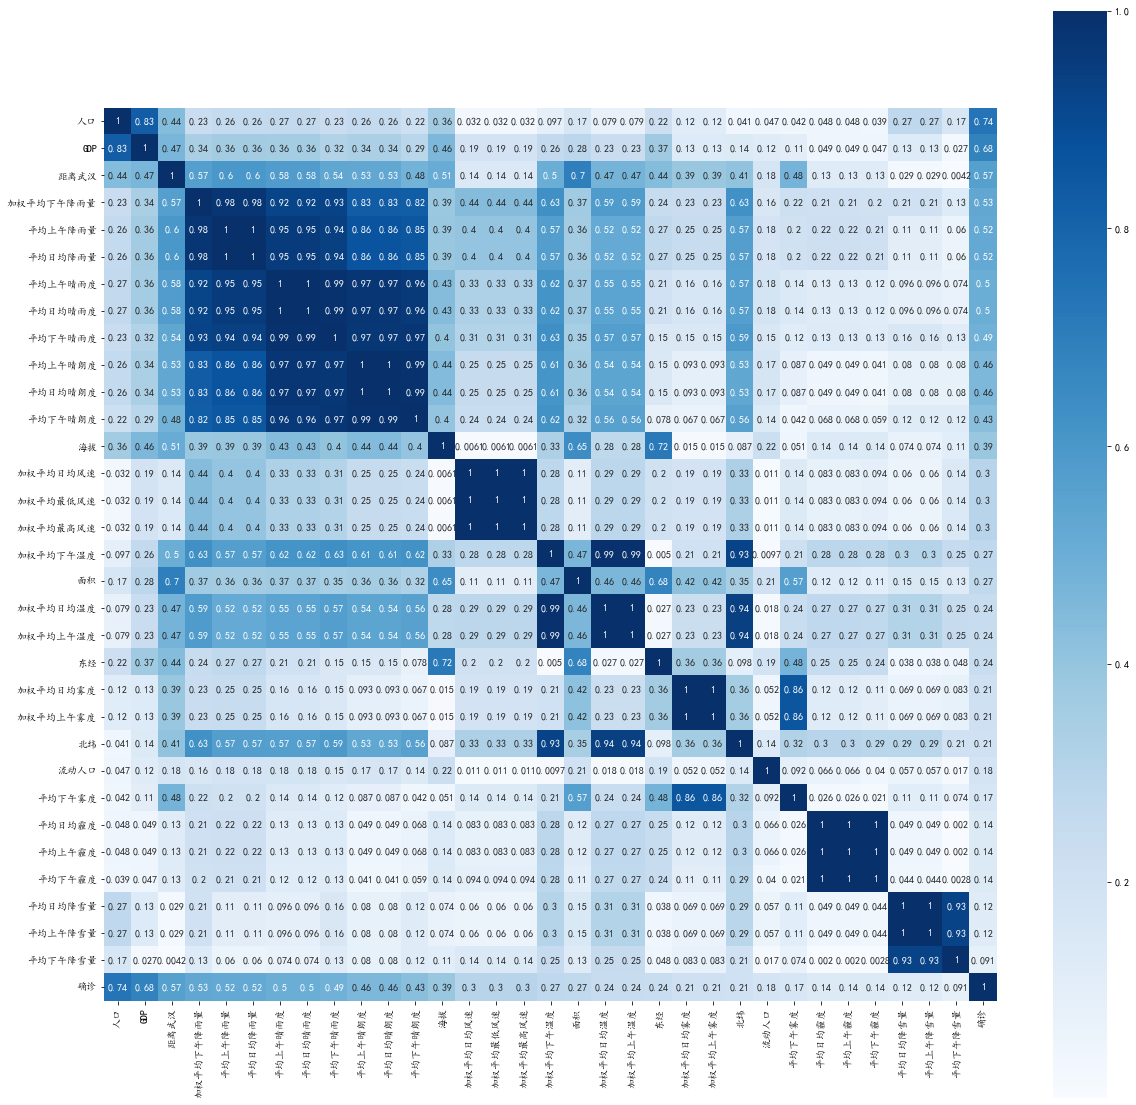

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df_region_info_weather = df_standard[selected_factors + [selected_target]]
df_corr = df_region_info_weather.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.abs(), annot=True, vmax=1, square=True, cmap="Blues")

如上图，将相互强相关的特征数据，取其中一个：对“上午”、“下午”、“最高”、“最低”、“日均”取“日均”。如下图。

再次筛选后的特征和目标：人口、GDP、距离武汉、平均日均降雨量、平均日均晴雨度、平均日均晴朗度、海拔、加权平均日均风速、面积、加权平均日均温度、东经、加权平均日均雾度、北纬、流动人口、平均日均霾度、平均日均降雪量、确诊


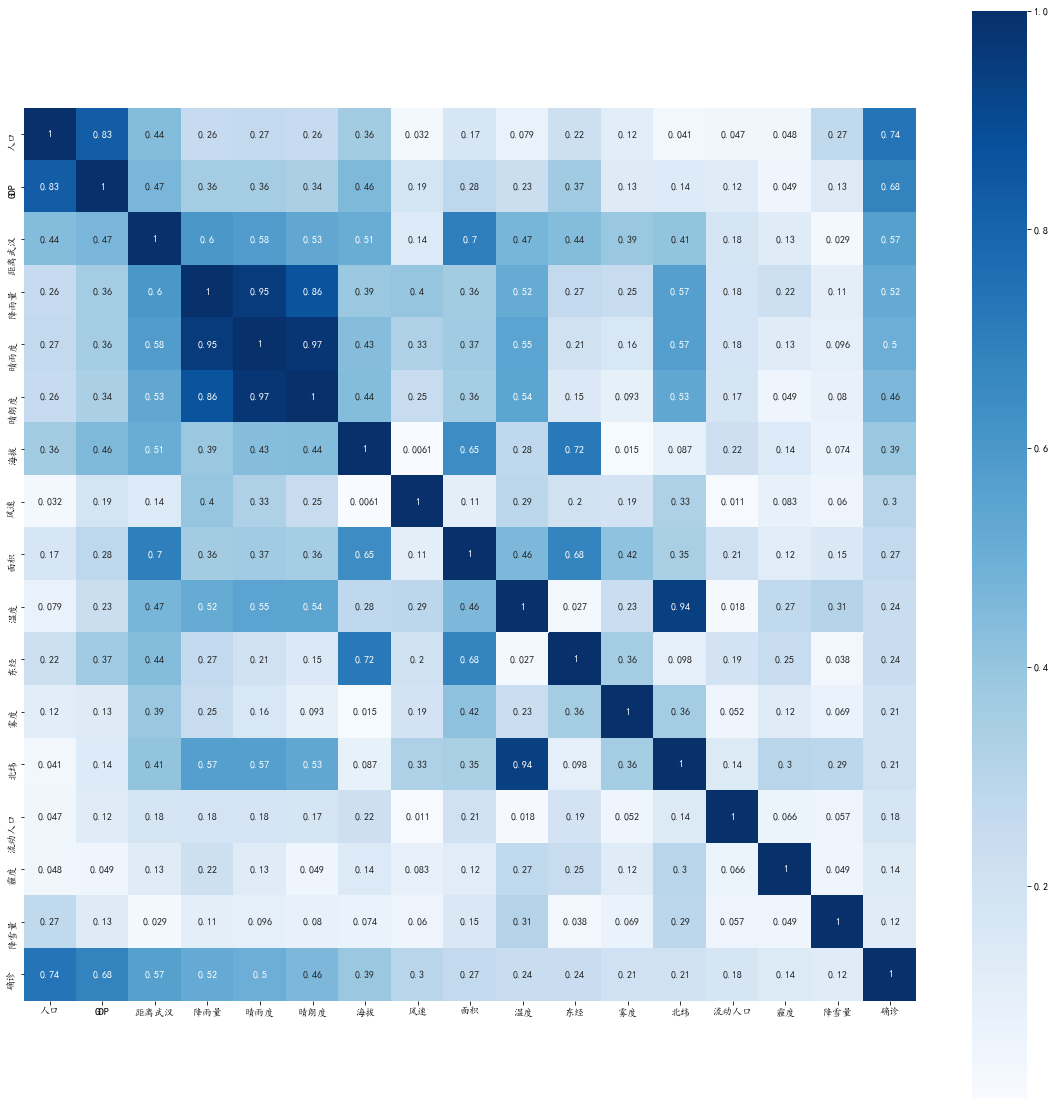

In [18]:
selected_cols = []
selected_col_short_names = []  # 后续对特征使用缩写的名称
for col in df_region_info_weather.columns:
    if '平均' in col:
        name = col.replace('加权', '').replace('上午', '').replace('下午', '').replace('最高', '')\
               .replace('最低', '').replace('日均', '')
        if '日均' in col:
            selected_cols.append(col)
            selected_col_short_names.append(name.replace('平均', ''))
    else:
        selected_cols.append(col)
        selected_col_short_names.append(col)
print('再次筛选后的特征和目标：{}'.format('、'.join(selected_cols)))
df_selected = df_region_info_weather[selected_cols]
df_selected.columns = selected_col_short_names
df_corr = df_selected.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.abs(), annot=True, vmax=1, square=True, cmap="Blues")

In [19]:
df_corr.iloc[-1:, :-1]

,人口,GDP,距离武汉,降雨量,晴雨度,晴朗度,海拔,风速,面积,温度,东经,雾度,北纬,流动人口,霾度,降雪量
确诊,0.738187,0.684281,-0.565993,0.520917,-0.501714,-0.457428,-0.389038,0.300466,-0.269198,0.242955,0.238652,-0.20976,-0.207591,0.178275,-0.138372,0.123305


### 1.8. 相关性分析结论

In [20]:
corr_analysis = df_corr.iloc[-1:, :-1].T
corr_analysis.columns = ['和确诊的相关性（绝对值越大表示越相关）']
corr_info_dict = {
    '人口': ('人口越多的地区，被确诊的人数越多', '人口越少的地区，被确诊的人数越多'),
    'GDP': ('GDP 越高的地区，被确诊的人数越多', 'GDP 越低的地区，被确诊的人数越多'),
    '距离武汉': ('离武汉越远，被确诊的人数越多', '离武汉越近，被确诊的人数越多'),
    '降雨量': ('降雨量越多的地区，被确诊的人数越多', '降雨量越少的地区，被确诊的人数越多'),
    '晴雨度': ('天越晴的地区，被确诊的人数越多', '天越阴雨的地区，被确诊的人数越多'),
    '晴朗度': ('天越晴的地区，被确诊的人数越多', '天越阴的地区，被确诊的人数越多'),
    '海拔': ('海拔越高的地区，被确诊的人数越多', '海拔越低的地区，被确诊的人数越多'),
    '面积': ('面积越大的地区，被确诊的人数越多', '面积越小的地区，被确诊的人数越多'),
    '温度': ('温度越高的地区，被确诊的人数越多', '温度越低的地区，被确诊的人数越多'),
    '流动人口': ('流动人口越高的地区，被确诊的人数越多', '流动人口越低的地区，被确诊的人数越多'),
    '东经': ('越东方的地区，被确诊的人数越多', '越北方的地区，被确诊的人数越多'),
    '北纬': ('越北方的地区，被确诊的人数越多', '越南方的地区，被确诊的人数越多'),
    '雾度': ('雾越多的地区，被确诊的人数越多', '雾越少的地区，被确诊的人数越多'),
    '霾度': ('霾越多的地区，被确诊的人数越多', '霾越少的地区，被确诊的人数越多'),
    '降雪量': ('降雪量越多的地区，被确诊的人数越多', '降雪量越少的地区，被确诊的人数越多'),
    '风速': ('风速越高的地区，被确诊的人数越多', '风速越低的地区，被确诊的人数越多'),
}
desc = []
for name, val in zip(corr_analysis.index, corr_analysis.values.reshape(-1)):
    if abs(val) > 0.1:
        if val > 0:
            desc.append(corr_info_dict[name][0])
        else:
            desc.append(corr_info_dict[name][1])
    else:
        desc.append('该因素几乎没有影响')
corr_analysis['新冠状病毒影响因素分析（影响力从高到低排序）'] = desc
pd.set_option('display.max_rows', 30)
corr_analysis

,和确诊的相关性（绝对值越大表示越相关）,新冠状病毒影响因素分析（影响力从高到低排序）
人口,0.738187,人口越多的地区，被确诊的人数越多
GDP,0.684281,GDP 越高的地区，被确诊的人数越多
距离武汉,-0.565993,离武汉越近，被确诊的人数越多
降雨量,0.520917,降雨量越多的地区，被确诊的人数越多
晴雨度,-0.501714,天越阴雨的地区，被确诊的人数越多
晴朗度,-0.457428,天越阴的地区，被确诊的人数越多
海拔,-0.389038,海拔越低的地区，被确诊的人数越多
风速,0.300466,风速越高的地区，被确诊的人数越多
面积,-0.269198,面积越小的地区，被确诊的人数越多
温度,0.242955,温度越高的地区，被确诊的人数越多


**从天气数据看，<font color=red>晴天</font>相对安全一些。**

## 2. 疫情趋势分析

### 2.1. 查看各地每日新增确诊人数趋势图

In [21]:
from coronavirus_analyzer import CoronavirusAnalyzer
from util.util import Util
import pandas as pd
import datetime

# FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. 
# The converter was registered by pandas on import. Future versions of pandas will require you to 
# explicitly register matplotlib converters.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 初始化分析类
analyzer = CoronavirusAnalyzer(last_date)

df_virus_daily_inc = analyzer.df_virus_daily_inc

regions = df_virus_daily_inc.columns.levels[0][df_virus_daily_inc.columns.codes[0][::4]]
df_virus_daily_inc_injured = analyzer.get_injured(df_virus_daily_inc)

2020-02-03 09:15:18,615 - CoronavirusAnalyzer - WARNING - 在最后一天（2020-02-01），如下这些地区没有新增的确诊人数：台湾、西藏，如下这些地区没有任何疫情数据变化：台湾、西藏。请确保这些地区已经公布了最后一天的数据（一般是后面一天上午公布），否则分析出来的结果可能不准确。


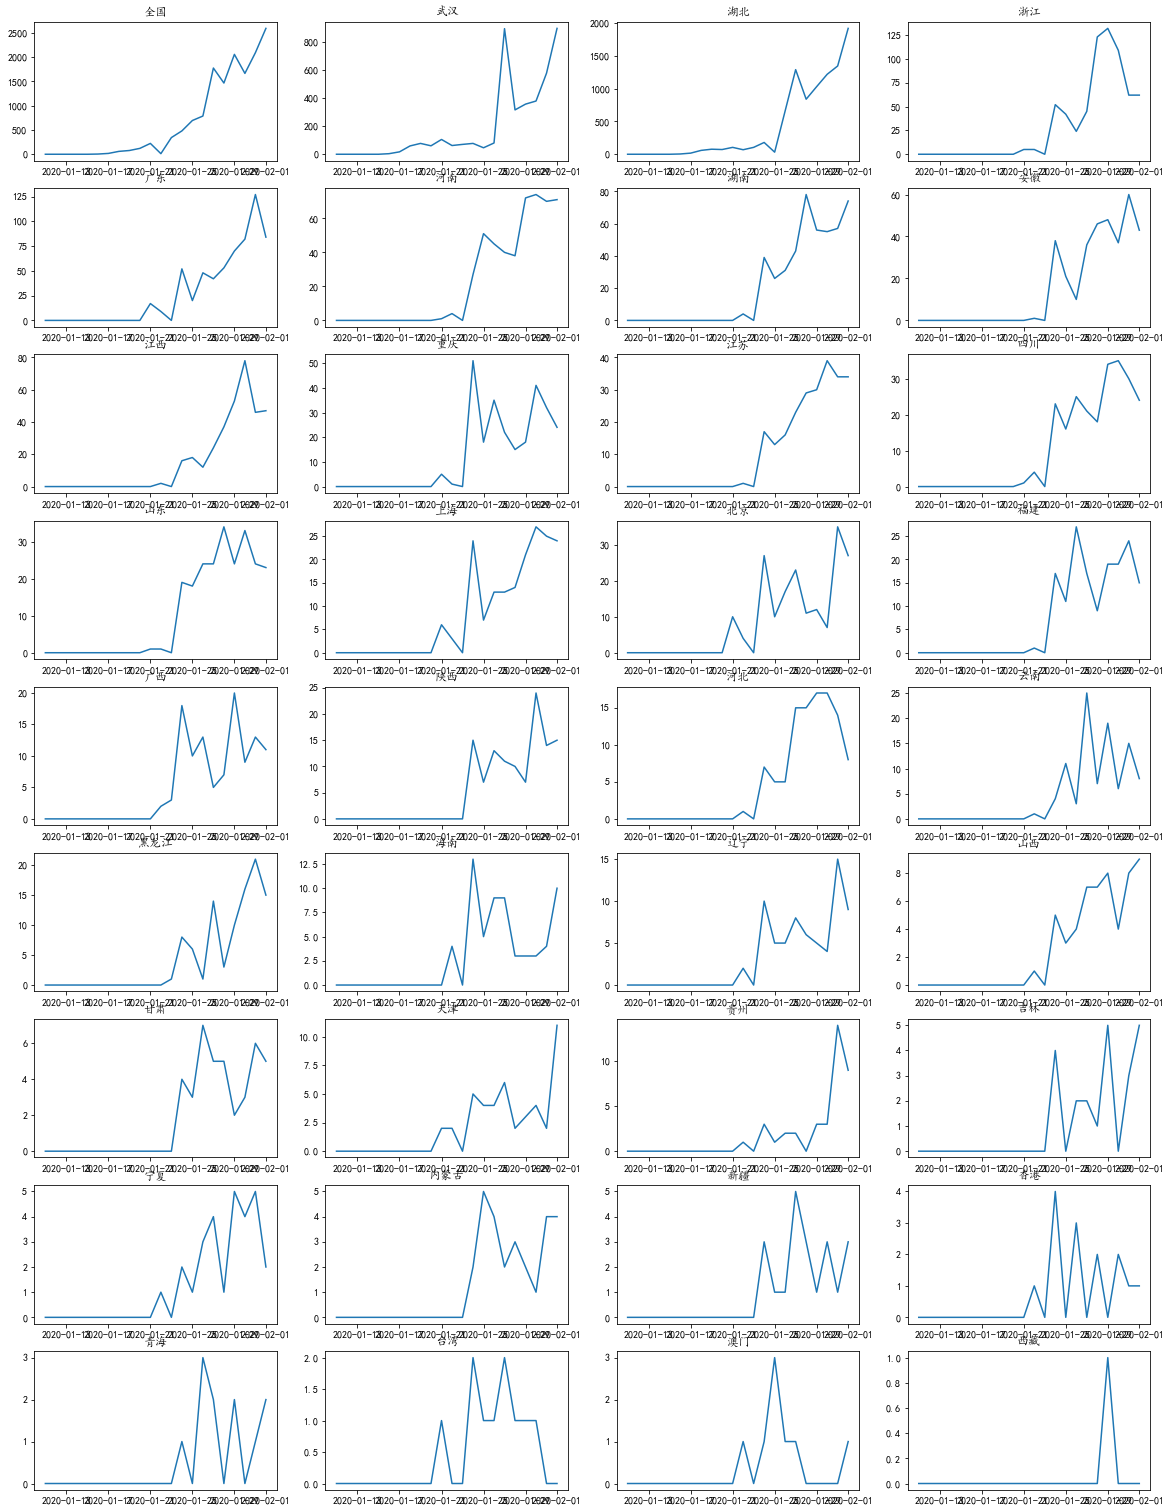

In [22]:
from util.util import Util
import matplotlib.pyplot as plt

analyzer.subplots(analyzer.df_virus_daily_inc_injured)

### 2.2. 分类
通过上面的图，可以看到一些相似趋势形状的图形，尝试用 max min 归一化，进行分类；但当前累计确诊人数全国各地差异较大，需要区别对待。

#### 2.2.1. 对各地当前累计确诊人数分类
将湖北、武汉区别出来，其他地区当前累计确诊人数用 k-means 分类

In [23]:
n_clusters = 5

df_recent_daily_injured = analyzer.df_recent_daily_injured
omitted_regions = ['全国', '武汉']
for region in omitted_regions:
    del df_recent_daily_injured[region]
clf, regions_by_cluster, cluster_centers = analyzer.k_means(
    df_recent_daily_injured, n_clusters=n_clusters, insure_sorted=True)
print('除了{}，累计确诊人数从高到低分 {} 类：'.format('、'.join(omitted_regions), n_clusters))
clusters_by_cum = {}
cum_desc = {0: '特多', 1: '多', 2: '中', 3: '少', 4: '极少'}
for i, _ in enumerate(zip(cluster_centers.tolist(), regions_by_cluster, cum_desc.values())):
    center, cluster, desc = _
    clusters_by_cum[i] = cluster
    print('{}：簇 id：{}，簇中心：{}，分类：{}'.format(desc, i, center[0], cluster))

除了全国、武汉，累计确诊人数从高到低分 5 类：
特多：簇 id：0，簇中心：9074.0，分类：['湖北']
多：簇 id：1，簇中心：555.25，分类：['浙江' '广东' '河南' '湖南']
中：簇 id：2，簇中心：271.1666666666667，分类：['安徽' '江西' '重庆' '江苏' '四川' '山东']
少：簇 id：3，簇中心：130.5，分类：['上海' '北京' '福建' '广西' '陕西' '河北' '云南' '黑龙江']
极少：簇 id：4，簇中心：30.199999999999932，分类：['海南' '辽宁' '山西' '甘肃' '天津' '贵州' '吉林' '宁夏' '内蒙古' '新疆' '香港' '青海' '台湾' '澳门'
 '西藏']


#### 2.2.2. 对各地每日新增确诊人数的 3 日均线走势图进行分类

先对数据作 3 日均线处理，以减少单日波动（比如有时候单日疑似数量非常多，但新增很少，到后面一天则相反）

In [24]:
# 均匀分布归一化数据，并用 k-means 分类
from sklearn import preprocessing
import pandas as pd

# 每天分类可能不同，需要做相应的调整，调整。方法是，先用 0,1,2...,n （n+1为簇总数）的顺序，执行程序并画图。
# 如果分类出来的簇中心的趋势严重性不是从高到低，则调整顺序。
_inc_desc = (
    (0, '新增趋势向上加剧'), 
    (1, '新增趋势向上放缓'), 
    (2, '新增趋势近期平稳'), 
    (3, '新增趋势有所降低'), 
    (4, '新增趋势显著降低'), 
)

inc_desc = {}
order = []
for i, _ in enumerate(_inc_desc):
    c_id, desc = _
    inc_desc[i] = desc
    order.append(c_id)
n_clusters = len(inc_desc)

# 3日新增确诊人数均值
df_ma3 = analyzer.moving_avg(analyzer.df_virus_daily_inc_injured, window_size=3)

min_max_scaler = preprocessing.MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(df_ma3)
df_min_max = pd.DataFrame(X_min_max, index=df_ma3.index, columns=df_ma3.columns)
for region in omitted_regions:
    del df_min_max[region]
clf, regions_by_cluster, cluster_centers = analyzer.k_means(
    df_min_max, n_clusters=n_clusters, max_iter=300, n_jobs=4, try_times=1000, order=order)
print('各数据离簇中心距离和：{}'.format(clf.inertia_))

各数据离簇中心距离和：5.751372495221927


簇 id：0，新增趋势向上加剧，['簇中心 1', '湖北', '广东', '江西', '黑龙江', '贵州']


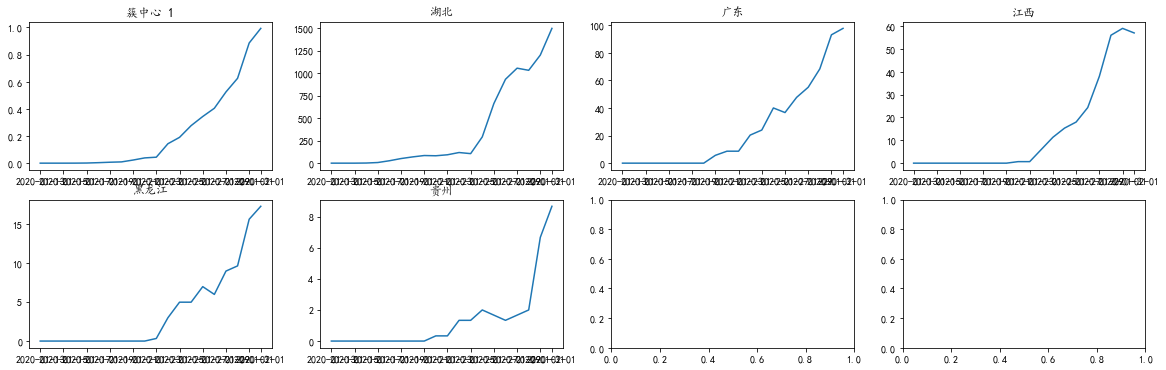

簇 id：1，新增趋势向上放缓，['簇中心 2', '浙江', '河南', '湖南', '安徽', '江苏', '四川', '山东', '上海', '陕西', '河北', '云南', '山西', '吉林', '宁夏']


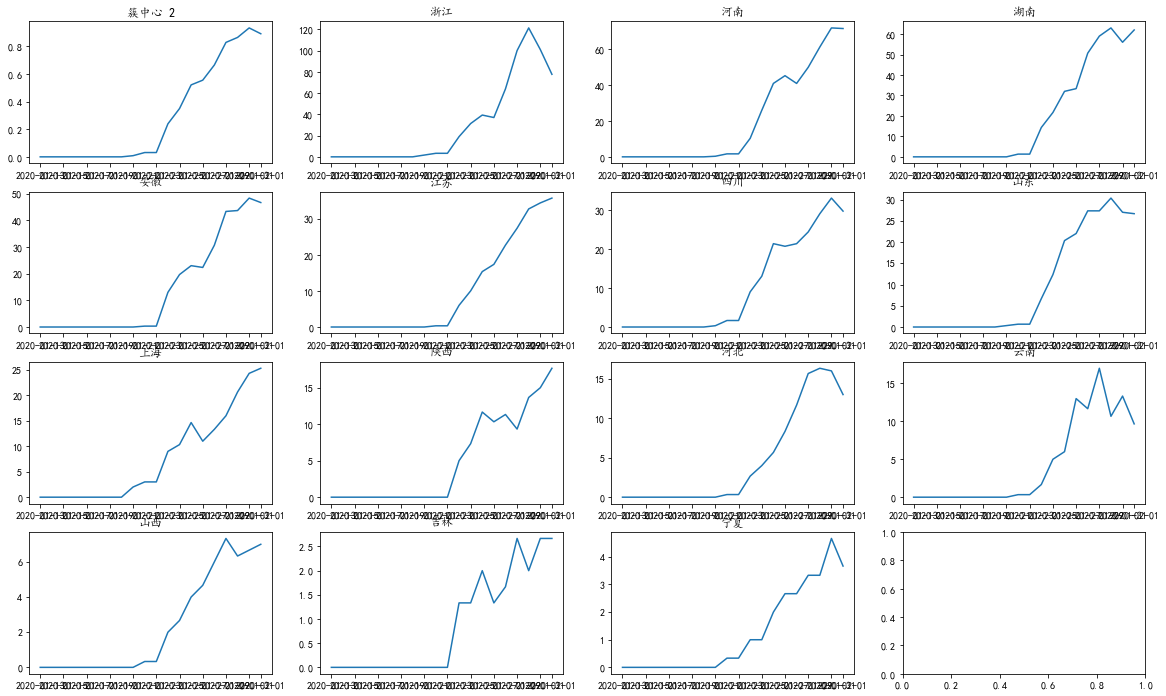

簇 id：2，新增趋势近期平稳，['簇中心 3', '重庆', '北京', '福建', '广西', '辽宁', '甘肃', '天津', '内蒙古', '新疆', '青海', '台湾']


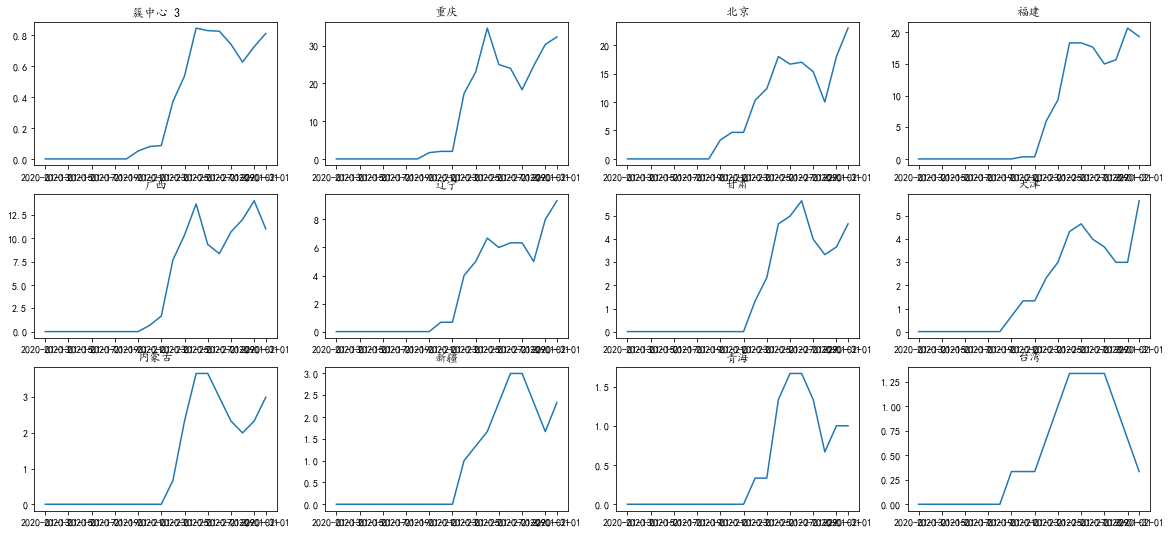

簇 id：3，新增趋势有所降低，['簇中心 4', '海南', '香港', '澳门']


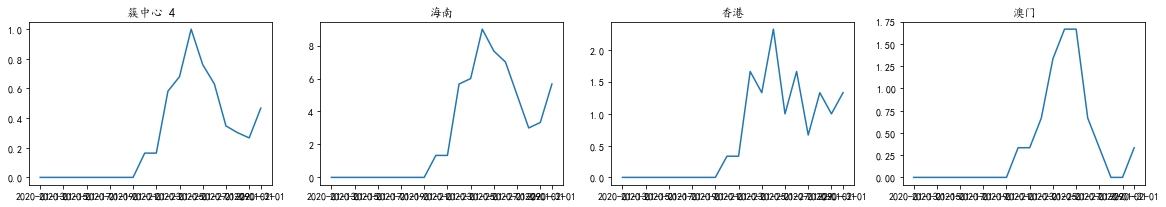

簇 id：4，新增趋势显著降低，['簇中心 5', '西藏']


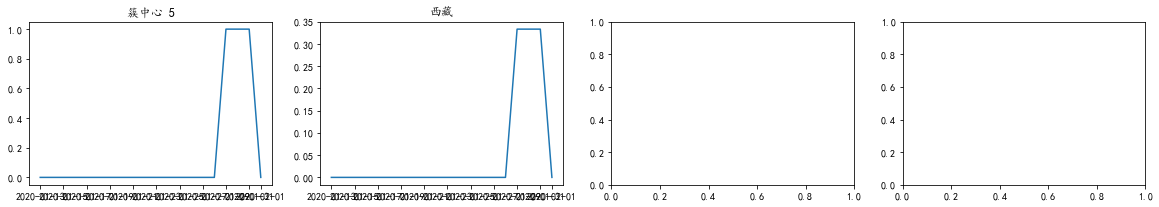

In [25]:
# 画出趋势图
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df_cluster_center = pd.DataFrame(cluster_centers.T, index=df_min_max.index, 
                                 columns=['簇中心 {}'.format(_ + 1) for _ in range(n_clusters)])
clusters_by_inc = {}
dfs = {}
for c_id, regions in enumerate(regions_by_cluster):
    clusters_by_inc[c_id] = regions
    df = df_cluster_center.iloc[:, [c_id]]
    dfs[c_id] = pd.concat([df, df_ma3[regions]], axis=1)
for c_id in range(n_clusters):
    print('=' * 100)
    print('簇 id：{}，{}，{}'.format(c_id, inc_desc[c_id], dfs[c_id].columns.tolist()))
    analyzer.subplots(dfs[c_id])

#### 2.2.3. 对上面两种分类汇总如下

In [26]:
import numpy as np
pd.set_option('display.max_rows', 50)
region_to_cum_id = {}
region_to_inc_id = {}
region_to_cum_desc = {}
region_to_inc_desc = {}
for region_dicts, clusters, desc in zip(
        [(region_to_cum_desc, region_to_cum_id), (region_to_inc_desc, region_to_inc_id)], 
        [clusters_by_cum, clusters_by_inc],
        [cum_desc, inc_desc]):
    region_dict, region_to_id = region_dicts
    for cluster_id, regions in clusters.items():
        for region in regions:
            region_to_id[region] = cluster_id
            if cluster_id == -1:
                cluster_id = 0
            val = desc[cluster_id]
            region_dict[region] = '{}'.format(val)
df_clusters = pd.DataFrame([
    pd.Series(region_to_cum_id), pd.Series(region_to_cum_desc),
    pd.Series(region_to_inc_id), pd.Series(region_to_inc_desc),
]).T
df_clusters.columns = ['累计簇 id', '累计', '趋势簇 id', '趋势']
df_clusters.fillna('特多', inplace=True)
# df_clusters['累计'] = pd.Categorical(df_clusters['累计'], ordered=True, categories=cum_desc.values())
# df_clusters['趋势'] = pd.Categorical(df_clusters['趋势'], ordered=True, categories=inc_desc.values())
df_clusters = df_clusters.sort_values(by=df_clusters.columns.tolist())

# 将累计和新增趋势取平均值
arr_cum = df_clusters['累计簇 id'].values
arr_inc = df_clusters['趋势簇 id'].values
cum_max = arr_cum.max()
inc_max = arr_inc.max()
arr_cum = arr_cum * inc_max
arr_inc = arr_inc * cum_max
a = np.mean([arr_cum, arr_inc], axis=0)
d = {_: i for i, _ in enumerate(np.unique(a))}
a = [d[_] for _ in a]
s = pd.Series(a, index=df_clusters.index, name='累计新增簇均值')
if s.name not in df_clusters.columns:
    df_clusters = pd.concat([df_clusters, s], axis=1)
df_clusters

,累计簇 id,累计,趋势簇 id,趋势,累计新增簇均值
湖北,0,特多,0,新增趋势向上加剧,0
广东,1,多,0,新增趋势向上加剧,1
浙江,1,多,1,新增趋势向上放缓,2
河南,1,多,1,新增趋势向上放缓,2
湖南,1,多,1,新增趋势向上放缓,2
江西,2,中,0,新增趋势向上加剧,2
安徽,2,中,1,新增趋势向上放缓,3
江苏,2,中,1,新增趋势向上放缓,3
四川,2,中,1,新增趋势向上放缓,3
山东,2,中,1,新增趋势向上放缓,3


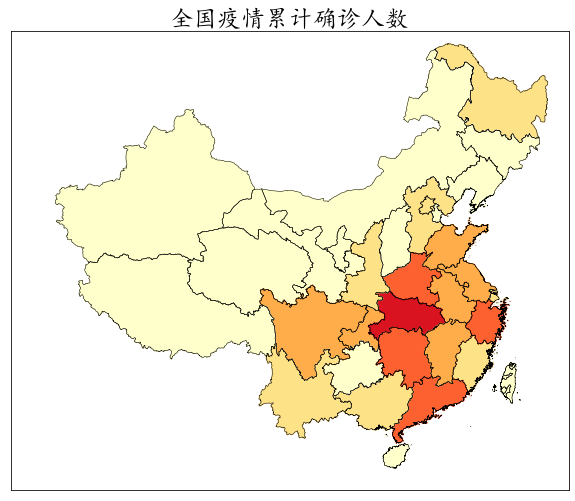

In [27]:
analyzer.plot_region_map(df_clusters['累计簇 id'], '全国疫情累计确诊人数')

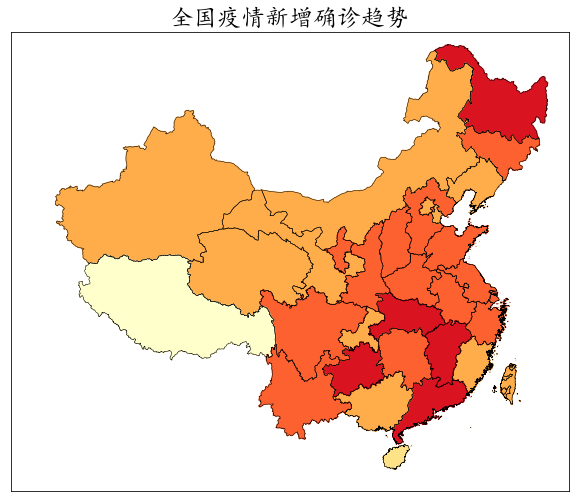

In [28]:
analyzer.plot_region_map(df_clusters['趋势簇 id'], '全国疫情新增确诊趋势')

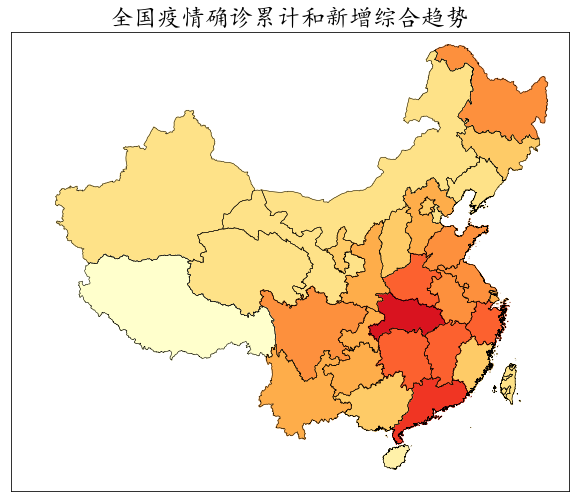

In [29]:
analyzer.plot_region_map(df_clusters['累计新增簇均值'], '全国疫情确诊累计和新增综合趋势')

## 3. 人流分析

通过百度迁徙获取的人流趋势数据（非人数，但是是可以比对的相对值，目前没有港澳台数据），按省/直辖市分类

In [2]:
from coronavirus_analyzer import CoronavirusAnalyzer
# last_date = '2020-02-01'
analyzer = CoronavirusAnalyzer(last_date)
df_move_in_injured = analyzer.del_city_regions(analyzer.df_move_in_injured)
df_move_in_injured.tail(3)

2020-02-03 10:50:26,264 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.
2020-02-03 10:50:26,505 - CoronavirusAnalyzer - WARNING - 在最后一天（2020-02-01），如下这些地区没有新增的确诊人数：台湾、西藏，如下这些地区没有任何疫情数据变化：台湾、西藏。请确保这些地区已经公布了最后一天的数据（一般是后面一天上午公布），否则分析出来的结果可能不准确。


,上海,云南,内蒙古,北京,吉林,四川,天津,宁夏,安徽,山东,...,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙江
日期,,,,,,,,,,,,,,,,,,,,,
2020-01-30,7.394248e+06,1.626946e+06,497386.222164,3.500827e+06,559906.028424,3.624658e+06,1.476404e+06,214526.829197,3.466665e+06,1.872625e+06,...,5.883230e+06,522812.395361,2.403946e+06,94264.480296,2.726232e+06,892041.508433,5.000357e+06,1.756093e+06,190941.365545,514136.276834
2020-01-31,8.785127e+06,1.895509e+06,491337.814108,4.203817e+06,522346.474224,3.725051e+06,1.493352e+06,261470.749010,4.108145e+06,2.036950e+06,...,6.833149e+06,643481.317930,3.024915e+06,94599.449802,2.850607e+06,967144.887475,4.838476e+06,1.973337e+06,244021.308199,554553.305424
2020-02-01,7.924375e+06,1.307709e+06,434542.354182,4.095906e+06,509080.370170,3.239168e+06,1.382855e+06,159543.853524,3.940262e+06,1.807877e+06,...,7.438098e+06,492409.491412,2.372042e+06,89657.918669,2.252286e+06,807371.212943,5.538779e+06,1.924665e+06,173775.364340,468097.565879


In [3]:
df_inc_injured = analyzer.df_virus_daily_inc_injured
# for region in ['湖北']:  # 去掉严重的湖北，以及目前无法获取到人流信息的港澳台
#     del df_inc_injured[region]
df_inc_injured = analyzer.del_city_special_regions(df_inc_injured)
df_inc_injured = df_inc_injured.sort_index(axis=1)
df_inc_injured.tail(3)

,上海,云南,内蒙古,北京,吉林,四川,天津,宁夏,安徽,山东,...,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙江
2020-01-30,27,6,1,7,0,35,4,4,37,33,...,55,3,19,0,3,4,41,24,0,16
2020-01-31,25,15,4,35,3,30,2,5,60,24,...,57,6,24,0,14,15,32,14,1,21
2020-02-01,24,8,4,27,5,24,11,2,43,23,...,74,5,15,0,9,9,24,15,2,15


In [4]:
from collections import OrderedDict
import numpy as np
import pandas as pd

s_virus_injured = analyzer.df_virus_injured.iloc[-1]
data = OrderedDict()
for region in df_move_in_injured.columns:
    corr_val = np.corrcoef(df_move_in_injured[region], df_inc_injured[region])[0, 1]
    data[region] = [s_virus_injured[region], corr_val]
df = pd.DataFrame(data).T
df.columns = ['累计确诊', '1月11日起每天新增确诊和近7天内进入人口风险系数的相关性']
df['累计确诊'] = df['累计确诊'].astype(np.int32)
df = df.sort_values('累计确诊', ascending=False)
df

,累计确诊,1月11日起每天新增确诊和近7天内进入人口风险系数的相关性
湖北,11177,0.731529
浙江,724,0.828900
广东,683,0.924547
河南,566,0.703741
湖南,521,0.791224
安徽,408,0.831969
江西,391,0.652065
重庆,300,0.718420
江苏,271,0.968566
四川,254,0.901783


从表中，可以看出：
1. 除了确诊人数最少的几个省，其他省或直辖市的相关性都较强；
2. 疫情最严重的湖北省相关性是0.73，那应该是流入湖北人数多的时候，湖北内部人流也多的原因导致的，所以，湖北这个相关性可以作为一个评估各地对疫情控制情况的一个参考阈值；
3. 疫情防控，一方面要加强外来人员的检查或控制，另一方面要加强内部疫情扩散的防范。除了确诊人数最少的几个省，相关性相对较强的（大于湖北相关性），相对有可能更需要加强外部人流疫情检查和控制；相关性相对较弱的，相对有可能更需要注意内部疫情防范；
4. 对于目前有公布外来人员确诊数量的北京、上海、天津，进行比对，也能基本验证这一点：上海外来人员确诊占比最高，新增确诊和进入人口风险系数的相关性也是最高的。

In [5]:
d = {'天津': 4 / 48, '北京': 11 / 191, '上海': 74 / 182}
_df = df.loc[list(d.keys())]
_df['外来人口确诊百分比（%）'] = pd.Series(d)
_df.sort_values('外来人口确诊百分比（%）')

,累计确诊,1月11日起每天新增确诊和近7天内进入人口风险系数的相关性,外来人口确诊百分比（%）
北京,191,0.725016,0.057592
天津,48,0.675749,0.083333
上海,193,0.860034,0.406593


## 4. 预测

### 4.1. 训练数据
使用全国各省、直辖市（为了更精准的训练，不包括疫情严重并封城的湖北省和缺少人流数据的港澳台）的各种数据进行训练。
有如下这些训练数据：

#### 4.1.1. 各地每日新增确诊人数（预测目标）

In [1]:
from coronavirus_analyzer import CoronavirusAnalyzer
# last_date = '2020-02-01'
analyzer = CoronavirusAnalyzer(last_date)
df_virus_daily_inc_injured = analyzer.del_city_special_regions(analyzer.df_virus_daily_inc_injured)
del df_virus_daily_inc_injured['湖北']
df_virus_daily_inc_injured.tail(3)

2020-02-03 13:40:45,281 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.
2020-02-03 13:40:45,563 - CoronavirusAnalyzer - WARNING - 在最后一天（2020-02-01），如下这些地区没有新增的确诊人数：台湾、西藏，如下这些地区没有任何疫情数据变化：台湾、西藏。请确保这些地区已经公布了最后一天的数据（一般是后面一天上午公布），否则分析出来的结果可能不准确。


,浙江,广东,河南,湖南,安徽,江西,重庆,江苏,四川,山东,...,山西,甘肃,天津,贵州,宁夏,吉林,内蒙古,新疆,青海,西藏
2020-01-30,109,82,74,55,37,78,41,39,35,33,...,4,3,4,3,4,0,1,3,0,0
2020-01-31,62,127,70,57,60,46,32,34,30,24,...,8,6,2,14,5,3,4,1,1,0
2020-02-01,62,84,71,74,43,47,24,34,24,23,...,9,5,11,9,2,5,4,3,2,0


#### 4.1.2. 近7天内进入人口风险系数（特征）

In [2]:
df_move_in_injured = analyzer.del_city_regions(analyzer.df_move_in_injured)
del df_move_in_injured['湖北']
df_move_in_injured.tail(3)

,上海,云南,内蒙古,北京,吉林,四川,天津,宁夏,安徽,山东,...,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙江
日期,,,,,,,,,,,,,,,,,,,,,
2020-01-30,7.394248e+06,1.626946e+06,497386.222164,3.500827e+06,559906.028424,3.624658e+06,1.476404e+06,214526.829197,3.466665e+06,1.872625e+06,...,5.883230e+06,522812.395361,2.403946e+06,94264.480296,2.726232e+06,892041.508433,5.000357e+06,1.756093e+06,190941.365545,514136.276834
2020-01-31,8.785127e+06,1.895509e+06,491337.814108,4.203817e+06,522346.474224,3.725051e+06,1.493352e+06,261470.749010,4.108145e+06,2.036950e+06,...,6.833149e+06,643481.317930,3.024915e+06,94599.449802,2.850607e+06,967144.887475,4.838476e+06,1.973337e+06,244021.308199,554553.305424
2020-02-01,7.924375e+06,1.307709e+06,434542.354182,4.095906e+06,509080.370170,3.239168e+06,1.382855e+06,159543.853524,3.940262e+06,1.807877e+06,...,7.438098e+06,492409.491412,2.372042e+06,89657.918669,2.252286e+06,807371.212943,5.538779e+06,1.924665e+06,173775.364340,468097.565879


#### 4.1.3. 天气的加权滑动平均值（特征）

In [3]:
df_weather_ma = analyzer.del_city_special_regions(analyzer.df_weather_ma)
del df_weather_ma['湖北']
df_weather_ma.tail(3)

上海                                      云南            \
           加权平均上午晴朗度 加权平均下午晴朗度 加权平均上午降雨量 加权平均下午降雨量 加权平均上午晴朗度 加权平均下午晴朗度   
日期                                                                       
2020-01-31        24        38       160       108       144       138   
2020-02-01        35        59       144        98       140       135   
2020-02-02        57        85       124        84       137       133   

                                     内蒙古            ...        陕西            \
           加权平均上午降雨量 加权平均下午降雨量 加权平均上午晴朗度 加权平均下午晴朗度  ... 加权平均上午降雨量 加权平均下午降雨量   
日期                                                  ...                       
2020-01-31        27        51       192       194  ...        34        34   
2020-02-01        24        45       186       194  ...        30        30   
2020-02-02        21        39       180       195  ...        26        26   

                  青海                                     黑龙江            \
           加权平均上午晴朗度 加权平均下午晴朗度 加权平均上午降雨量 加权平均下午降雨量 加权平均上午晴朗度 加权平均下午晴朗度   
日期                                                                       
2020-01-31       191       173         0         0       151       189   
2020-02-01       198       181         0         0       161       196   
2020-02-02       204       187         0         0       171       203   

                                
           加权平均上午降雨量 加权平均下午降雨量  
日期                              
2020-01-31         0         0  
2020-02-01         0         0  
2020-02-02         0         0  

[3 rows x 120 columns]

#### 4.1.4. 每日累计确诊人数（特征）

In [4]:
df_virus_daily_injured = analyzer.del_city_special_regions(analyzer.df_virus_daily_injured)
df_virus_daily_injured.tail(3)

,湖北,浙江,广东,河南,湖南,安徽,江西,重庆,江苏,四川,...,山西,甘肃,天津,贵州,宁夏,吉林,内蒙古,新疆,青海,西藏
2020-01-30,5806,537,393,352,332,237,240,206,168,177,...,39,29,32,15,21,14,19,17,8,1
2020-01-31,7153,599,520,422,389,297,286,238,202,207,...,47,35,34,29,26,17,23,18,9,1
2020-02-01,9074,661,604,493,463,340,333,262,236,231,...,56,40,45,38,28,22,27,21,11,1


#### 4.1.5. 最近 7 天每日新增确诊人数（特征）

In [5]:
df_virus_7_days = analyzer.del_city_special_regions(analyzer.df_virus_7_days_inc_injured)
del df_virus_7_days['湖北']
df_virus_7_days.tail(3)

上海                          云南          ...  青海         黑龙江      \
           7天前 6天前 5天前 4天前 3天前 2天前 1天前 7天前 6天前 5天前  ... 3天前 2天前 1天前 7天前 6天前   
2020-01-30   0  24   7  13  13  14  21   0   4  11  ...   2   0   2   1   8   
2020-01-31  24   7  13  13  14  21  27   4  11   3  ...   0   2   0   8   6   
2020-02-01   7  13  13  14  21  27  25  11   3  25  ...   2   0   1   6   1   

                                
           5天前 4天前 3天前 2天前 1天前  
2020-01-30   6   1  14   3  10  
2020-01-31   1  14   3  10  16  
2020-02-01  14   3  10  16  21  

[3 rows x 210 columns]

#### 4.1.6. 合并所有特征数据到一起

In [6]:
import pandas as pd
# 1 级列索引转 2 级列索引
if not isinstance(df_move_in_injured.columns, pd.MultiIndex):
    df_move_in_injured.columns = pd.MultiIndex.from_product([df_move_in_injured.columns, ['人流风险系数']])
    df_virus_daily_injured.columns = pd.MultiIndex.from_product([df_virus_daily_injured.columns, ['累计确诊']])
# index 统一从 2020-01-11 到 last_date，并合并 4 个 DataFrame
index = df_move_in_injured.index
dfs = []
# for df in [df_move_in_injured, df_virus_daily_injured, df_virus_7_days, df_weather_ma]:
for df in [df_move_in_injured, df_virus_daily_injured, df_virus_7_days]:
# for df in [df_virus_7_days]:
    try:
        del df['湖北']
    except:
        pass
    if df.shape[0] != index.size:
        df = df.reindex(index)
    dfs.append(df)
df_trait = pd.concat(dfs, axis=1, sort=False)
df_trait = df_trait.sort_index(axis=1)
df_trait.tail(3)

上海                                             云南  ...   青海 黑龙江  \
           1天前 2天前 3天前 4天前 5天前 6天前 7天前        人流风险系数 累计确诊 1天前  ... 累计确诊 1天前   
日期                                                             ...            
2020-01-30  21  14  13  13   7  24   0  7.394248e+06  128  19  ...    8  10   
2020-01-31  27  21  14  13  13   7  24  8.785127e+06  153   6  ...    9  16   
2020-02-01  25  27  21  14  13  13   7  7.924375e+06  177  15  ...   11  21   

                                                        
           2天前 3天前 4天前 5天前 6天前 7天前         人流风险系数 累计确诊  
日期                                                      
2020-01-30   3  14   1   6   8   1  514136.276834   59  
2020-01-31  10   3  14   1   6   8  554553.305424   80  
2020-02-01  16  10   3  14   1   6  468097.565879   95  

[3 rows x 270 columns]

### 4.2. XGBoost 预测

#### 4.2.1. 划分训练集、测试集

In [7]:
import numpy as np
df_X_train = df_trait.iloc[:-1]
df_y_train = df_virus_daily_inc_injured.iloc[:-1]
df_X_test = df_trait.iloc[-1:]
df_y_test = df_virus_daily_inc_injured.iloc[-1:]
X_train = None
y_train = None
X_test = None
y_test = None
for region in df_y_train.columns:
    arr_X_train = df_X_train[region].values
    arr_y_train = df_y_train[region].values
    arr_X_test = df_X_test[region].values
    arr_y_test = df_y_test[region].values
    if X_train is None:
        X_train = arr_X_train
        y_train = arr_y_train
        X_test = arr_X_test
        y_test = arr_y_test
    else:
        X_train = np.vstack([X_train, arr_X_train])
        y_train = np.hstack([y_train, arr_y_train])
        X_test = np.vstack([X_test, arr_X_test])
        y_test = np.hstack([y_test, arr_y_test])
X_train.shape, y_train.shape

((630, 9), (630,))

#### 4.2.2. 训练

In [11]:
import xgboost as xgb

model = xgb.XGBRegressor(
#     max_depth=9,
#     learning_rate=0.1,
#     n_estimators=122,
#     max_depth=2,
#     learning_rate=0.07,
#     n_estimators=110,
    max_depth=6,
    learning_rate=0.12,
    n_estimators=120,
    objective='reg:gamma')
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.12, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=120,
             n_jobs=1, nthread=None, objective='reg:gamma', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [12]:
# np.set_printoptions(precision=1)
# np.set_printoptions(suppress=True)
df_predict = pd.DataFrame(np.array([model.predict(X_test), y_test]).T, 
                          index=df_virus_daily_inc_injured.columns, columns=['预测', '实际'])
region_cnt = df_predict.shape[0]
df_predict['预测误差'] = (df_predict['预测'] - df_predict['实际']) / df_predict['实际']
df_predict['预测误差'][df_predict['实际'].values == 0] = 0
df_predict['权重'] = region_cnt * df_predict['实际'] / df_predict['实际'].sum()
df_predict['加权预测误差'] = df_predict['预测误差'] * df_predict['权重']
df_predict['预测差'] = df_predict['预测'] - df_predict['实际']
err_rate = abs(df_predict['加权预测误差'].values).sum() / region_cnt
err_sum = abs(df_predict['预测差'].values).sum()
print('预测差绝对值的总和：{}，加权预测误差绝对值的均值：{}'.format(err_sum, err_rate))
df_predict

预测差绝对值的总和：186.50463245809078，加权预测误差绝对值的均值：0.2750805788467415


,预测,实际,预测误差,权重,加权预测误差,预测差
浙江,6.651521e+01,62.0,0.072826,2.743363,0.199788,4.515205e+00
广东,8.231748e+01,84.0,-0.020030,3.716814,-0.074448,-1.682518e+00
河南,6.651521e+01,71.0,-0.063166,3.141593,-0.198442,-4.484795e+00
湖南,7.035366e+01,74.0,-0.049275,3.274336,-0.161342,-3.646339e+00
安徽,7.182224e+01,43.0,0.670285,1.902655,1.275320,2.882224e+01
江西,6.868503e+01,47.0,0.461384,2.079646,0.959515,2.168503e+01
重庆,4.803773e+01,24.0,1.001572,1.061947,1.063617,2.403773e+01
江苏,3.516506e+01,34.0,0.034266,1.504425,0.051551,1.165058e+00
四川,3.451167e+01,24.0,0.437986,1.061947,0.465118,1.051167e+01
山东,3.740878e+01,23.0,0.626468,1.017699,0.637556,1.440878e+01


#### 4.2.2 参数调优

遍历几个主要的参数

In [10]:
import xgboost as xgb

min_err_rate = 1
best_max_depth = best_n_estimators = best_learning_rate = None
for max_depth in range(2, 12):
#     print('max_depth: {}'.format(max_depth))
    for n_estimators in range(110, 130, 1):
#         print('n_estimators: {}'.format(n_estimators))
        for learning_rate in range(7, 14):
            learning_rate = learning_rate / 100
            model = xgb.XGBRegressor(
                max_depth=max_depth, 
                learning_rate=learning_rate, 
                n_estimators=n_estimators, 
                objective='reg:gamma')
            model.fit(X_train, y_train)
            region_cnt = df_predict.shape[0]
            df_predict = pd.DataFrame(np.array([model.predict(X_test), y_test]).T, 
                                      index=df_virus_daily_inc_injured.columns, columns=['预测', '实际'])
            df_predict['预测误差'] = (df_predict['预测'] - df_predict['实际']) / df_predict['实际']
            df_predict['预测误差'][df_predict['实际'].values == 0] = 0
            df_predict['权重'] = region_cnt * df_predict['实际'] / df_predict['实际'].sum()
            df_predict['加权预测误差'] = df_predict['预测误差'] * df_predict['权重']
            err_rate = abs(df_predict['加权预测误差'].values).sum() / region_cnt
            if err_rate < min_err_rate:
                print('max_depth：{}，n_estimators：{}，learning_rate：{}，加权预测误差绝对值的均值：{}'
                      .format(max_depth, n_estimators, learning_rate, err_rate))
                if min_err_rate > err_rate:
                    min_err_rate = err_rate
                    best_max_depth = max_depth
                    best_n_estimators = n_estimators
                    best_learning_rate = learning_rate
print('best_max_depth：{}，best_n_estimators：{}，best_learning_rate：{}，加权预测误差绝对值的均值：{}'
      .format(best_max_depth, best_n_estimators, best_learning_rate, min_err_rate))

max_depth：2，n_estimators：110，learning_rate：0.07，加权预测误差绝对值的均值：0.3387306731710744
max_depth：2，n_estimators：110，learning_rate：0.08，加权预测误差绝对值的均值：0.32824801625052036
max_depth：2，n_estimators：110，learning_rate：0.09，加权预测误差绝对值的均值：0.3130242223233248
max_depth：2，n_estimators：110，learning_rate：0.11，加权预测误差绝对值的均值：0.3119553985145592
max_depth：2，n_estimators：110，learning_rate：0.13，加权预测误差绝对值的均值：0.2975129346228631
max_depth：2，n_estimators：113，learning_rate：0.13，加权预测误差绝对值的均值：0.29738587756424173
max_depth：2，n_estimators：114，learning_rate：0.13，加权预测误差绝对值的均值：0.2973536885945143
max_depth：2，n_estimators：115，learning_rate：0.13，加权预测误差绝对值的均值：0.2970204581904904
max_depth：4，n_estimators：110，learning_rate：0.09，加权预测误差绝对值的均值：0.28953227743638305
max_depth：4，n_estimators：113，learning_rate：0.09，加权预测误差绝对值的均值：0.289464931572433
max_depth：4，n_estimators：123，learning_rate：0.09，加权预测误差绝对值的均值：0.28921909423704334
max_depth：4，n_estimators：124，learning_rate：0.09，加权预测误差绝对值的均值：0.28913283699733316
max_depth：4，n_estimators：126，learnin